# List of the Attribute

ID -  Numbers in series

Sepal Length - Sepal Length in cm

Sepal Width -  Sepal Width in cm

Petal Length - Petal Length in cm

Petal Width - Petal Width in cm

Species - This is the class of the flower that is Iris Setosa, Iris versicoclor, Iris Virginica

In [1]:
#Importing Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
warnings.filterwarnings("ignore")  #to ignore warnings
iris_df = pd.read_csv("C:\\Users\\aakas\\Desktop\\python dataset\\Iris dataset.csv", header = 0)

In [3]:
iris_df.head()  #to check the first few rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Data Preprocessing 
#Checking for null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As we can see there are no null values

In [5]:
#Checking for any outliers are present
print(iris_df.describe(np.arange(0.9,0.99,0.01), include = 'all'))

                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count   150.000000     150.000000    150.000000     150.000000    150.000000   
unique         NaN            NaN           NaN            NaN           NaN   
top            NaN            NaN           NaN            NaN           NaN   
freq           NaN            NaN           NaN            NaN           NaN   
mean     75.500000       5.843333      3.054000       3.758667      1.198667   
std      43.445368       0.828066      0.433594       1.764420      0.763161   
min       1.000000       4.300000      2.000000       1.000000      0.100000   
50%      75.500000       5.800000      3.000000       4.350000      1.300000   
90%     135.100000       6.900000      3.610000       5.800000      2.200000   
91%     136.590000       6.900000      3.700000       5.800000      2.259000   
92%     138.080000       7.008000      3.708000       5.900000      2.300000   
93%     139.570000       7.157000      3

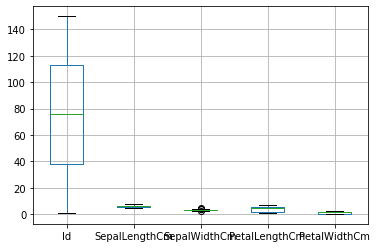

In [6]:
iris_df.boxplot()
plt.show()

As we can see there are no outliers

In [7]:
colname = ['Species']
colname

['Species']

In [8]:
#label Encoding
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    iris_df[x]= le.fit_transform(iris_df[x])

In [9]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
X = iris_df.values[:,:-1]
Y = iris_df.values[:,-1]

In [11]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)


In [12]:
#Running the basic model 
from sklearn.linear_model import LogisticRegression

#Create the model
classifier = LogisticRegression()

#Fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classifier.coef_)
print(classifier.intercept_)

[[-0.08823732  0.83450141  1.31891798 -1.46563593 -0.66427156]
 [-0.04235884  0.1576401  -1.34159477  1.20884884 -0.42238552]
 [ 0.09376534 -1.99357462 -1.6449461   1.43919315  1.28366865]]
[ 0.37341625  1.29515538 -1.23547779]


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.85      0.92        13
         2.0       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

Accuracy of the model:  0.9333333333333333
